In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [5]:
df_iris = pd.read_csv("./iris.data",header=None)

In [10]:
df_iris.columns = ["sepal_length","sepal_width","petal_length","petal_width","class"]

In [13]:
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [15]:
df_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [18]:
df_iris.shape

(150, 5)

In [19]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [22]:
df_iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

In [25]:
data = df_iris.drop_duplicates(subset ="class",)
data

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
50,7.0,3.2,4.7,1.4,Iris-versicolor
100,6.3,3.3,6.0,2.5,Iris-virginica


In [28]:
df_iris.value_counts("class")

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

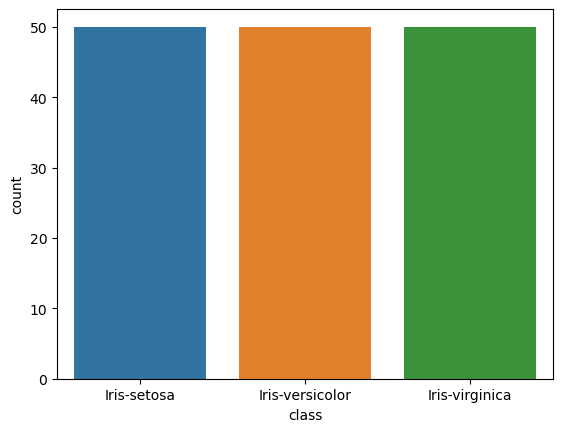

In [31]:
sns.countplot(x='class', data=df_iris, )
plt.show()

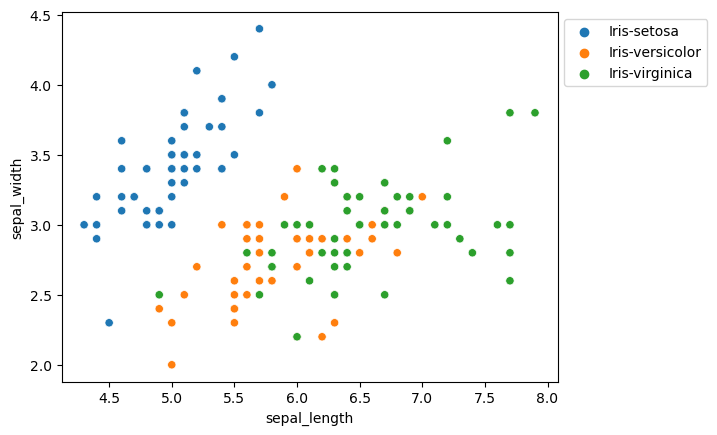

In [32]:
sns.scatterplot(x='sepal_length', y='sepal_width',
                hue='class', data=df_iris, )
 
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
 
plt.show()

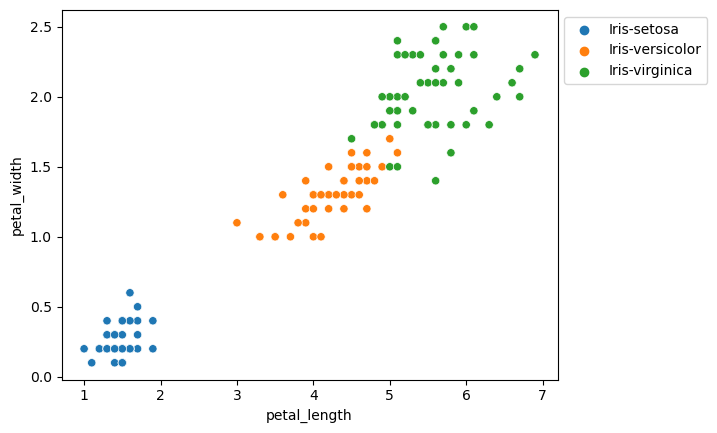

In [33]:
sns.scatterplot(x='petal_length', y='petal_width',
                hue='class', data=df_iris, )
 
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
 
plt.show()

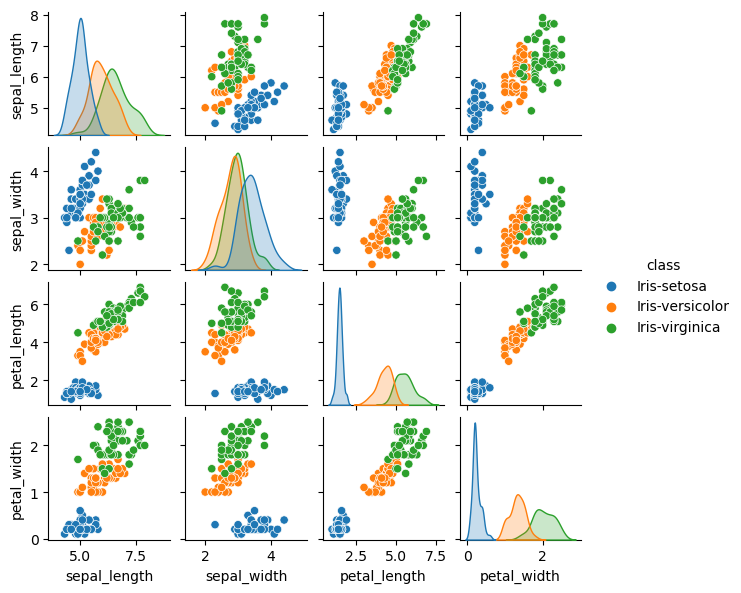

In [38]:
sns.pairplot(df_iris, hue='class', height=1.5)

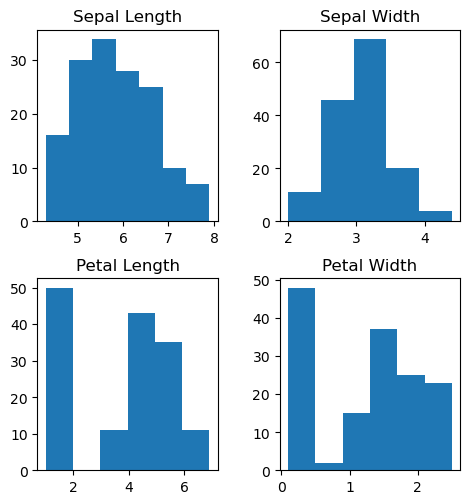

In [43]:
fig, axes = plt.subplots(2, 2, figsize=(5,5))
fig.tight_layout(h_pad=2)
axes[0,0].set_title("Sepal Length")
axes[0,0].hist(df_iris['sepal_length'], bins=7)
 
axes[0,1].set_title("Sepal Width")
axes[0,1].hist(df_iris['sepal_width'], bins=5);
 
axes[1,0].set_title("Petal Length")
axes[1,0].hist(df_iris['petal_length'], bins=6);
 
axes[1,1].set_title("Petal Width")
axes[1,1].hist(df_iris['petal_width'], bins=6);

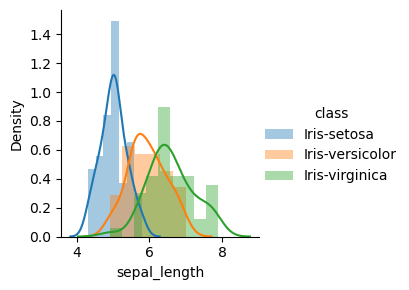

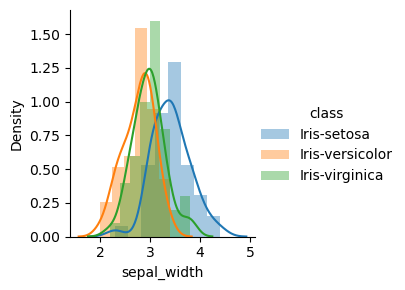

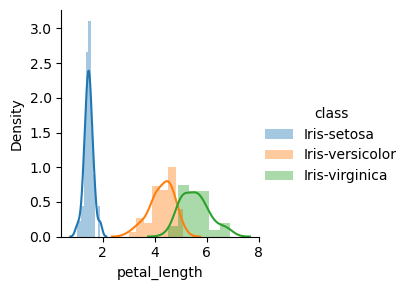

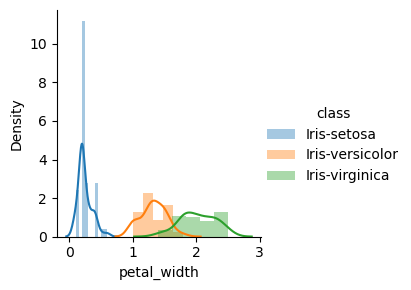

In [47]:
plot = sns.FacetGrid(df_iris, hue="class")
plot.map(sns.distplot, "sepal_length").add_legend()
 
plot = sns.FacetGrid(df_iris, hue="class")
plot.map(sns.distplot, "sepal_width").add_legend()
 
plot = sns.FacetGrid(df_iris, hue="class")
plot.map(sns.distplot, "petal_length").add_legend()
 
plot = sns.FacetGrid(df_iris, hue="class")
plot.map(sns.distplot, "petal_width").add_legend()
 
plt.show()

In [48]:
df_iris.corr(method='pearson')

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


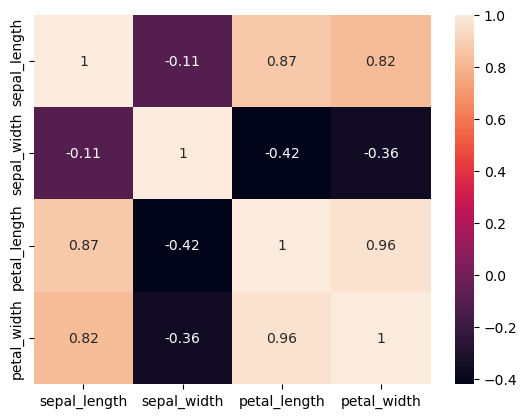

In [50]:
sns.heatmap(df_iris.corr(method='pearson'),
            annot = True);
 
plt.show()

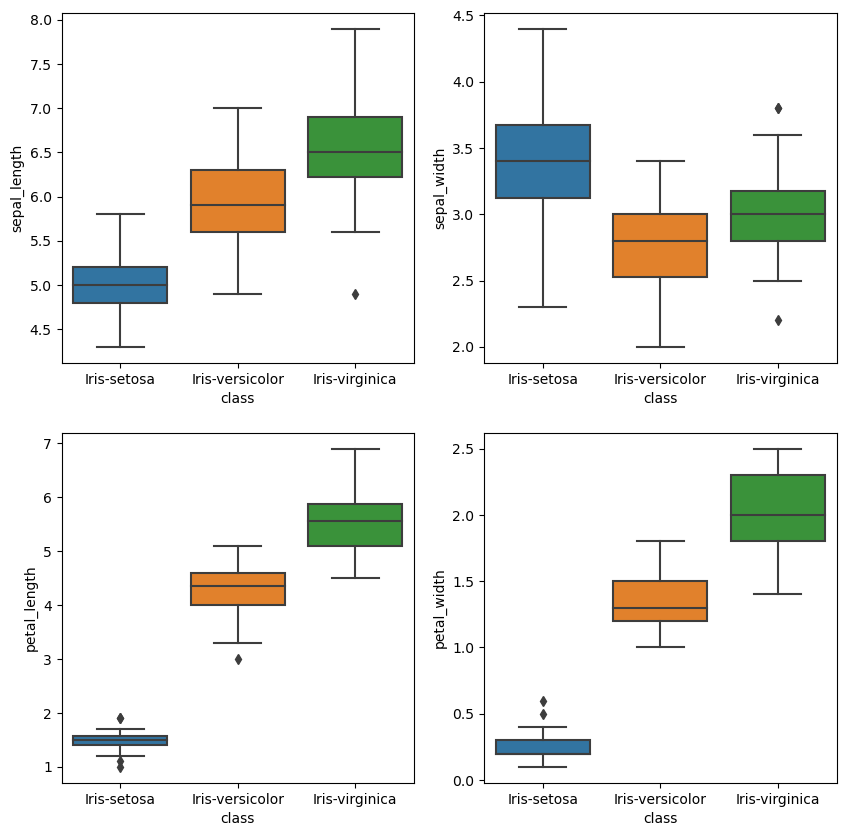

In [51]:
def graph(y):
    sns.boxplot(x="class", y=y, data=df_iris)

plt.figure(figsize=(10,10))
     
# Adding the subplot at the specified
# grid position
plt.subplot(221)
graph('sepal_length')
 
plt.subplot(222)
graph('sepal_width')
 
plt.subplot(223)
graph('petal_length')
 
plt.subplot(224)
graph('petal_width')
 
plt.show()

<AxesSubplot:xlabel='sepal_width'>

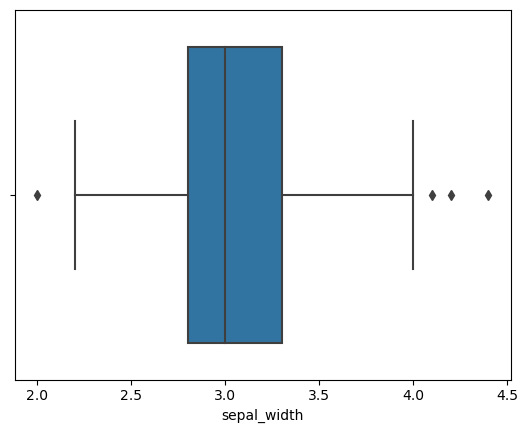

In [52]:
sns.boxplot(x='sepal_width', data=df_iris)

Old Shape:  (59, 1)
New Shape:  (146, 5)


<AxesSubplot:xlabel='sepal_width'>

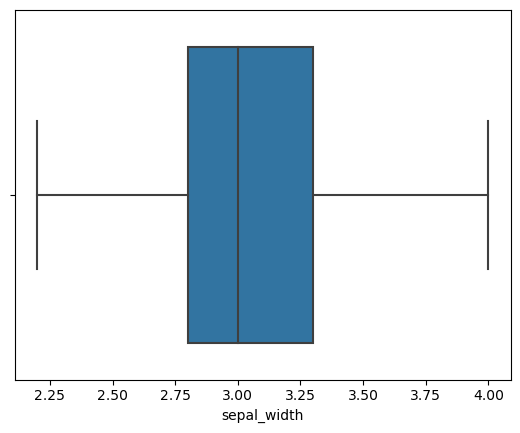

In [55]:
## remove outliers using IQR Method
Q1 = np.percentile(df_iris['sepal_width'], 25,
                interpolation = 'midpoint')
 
Q3 = np.percentile(df_iris['sepal_width'], 75,
                interpolation = 'midpoint')

IQR = Q3 - Q1
 
print("Old Shape: ", df.shape)
 
# Upper bound
upper = np.where(df_iris['sepal_width'] >= (Q3+1.5*IQR))
 
# Lower bound
lower = np.where(df_iris['sepal_width'] <= (Q1-1.5*IQR))
 
# Removing the Outliers
df_iris.drop(upper[0], inplace = True)
df_iris.drop(lower[0], inplace = True)
 
print("New Shape: ", df_iris.shape)
 
sns.boxplot(x='sepal_width', data=df_iris)


In [56]:
df_iris.shape

(146, 5)

In [57]:
## Begin Applying various machine learning techniques

In [60]:
# importing alll the necessary packages to use the various classification algorithms
from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier  # for K nearest neighbours
from sklearn import svm  #for Support Vector Machine (SVM) Algorithm
from sklearn import metrics #for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm

In [61]:
df_iris.shape #get the shape of the dataset

(146, 5)

In [62]:
train, test = train_test_split(df_iris, test_size = 0.3)# in this our main data is split into train and test
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
print(train.shape)
print(test.shape)

(102, 5)
(44, 5)


In [68]:
train_X = train[['sepal_length','sepal_width','petal_length','petal_width']]# taking the training data features
train_y= train["class"] # output of our training data
test_X= test[['sepal_length','sepal_width','petal_length','petal_width']] # taking test data features
test_y =test["class"]   #output value of test data

In [69]:
##Support Vector Machine (SVM)
model = svm.SVC() #select the algorithm
model.fit(train_X,train_y) # we train the algorithm with the training data and the training output
prediction=model.predict(test_X) #now we pass the testing data to the trained algorithm
print('The accuracy of the SVM is:',metrics.accuracy_score(prediction,test_y))#now we check the accuracy of the algorithm. 
#we pass the predicted output by the model and the actual output

The accuracy of the SVM is: 1.0


In [70]:
##Logistic Regression
model = LogisticRegression()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,test_y))

The accuracy of the Logistic Regression is 1.0


In [71]:
#Decision Tree
model=DecisionTreeClassifier()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction,test_y))

The accuracy of the Decision Tree is 0.9772727272727273


In [72]:
#K-nearest Neighbors
model=KNeighborsClassifier(n_neighbors=3) #this examines 3 neighbours for putting the new data into a class
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction,test_y))

The accuracy of the KNN is 1.0


([<matplotlib.axis.XTick at 0x7ff25988d2e0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

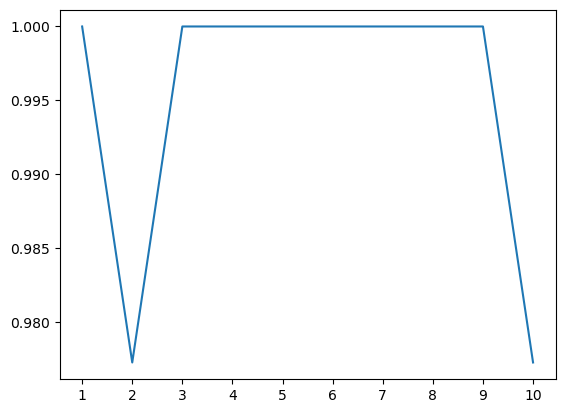

In [73]:
#accuracy for various values of n for K-Nearest nerighbours
a_index=list(range(1,11))
a=pd.Series()
x=[1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_y)))
plt.plot(a_index, a)
plt.xticks(x)

In [74]:
petal=df_iris[['petal_length','petal_width','class']]
sepal=df_iris[['sepal_length','sepal_width','class']]

In [77]:
train_p,test_p=train_test_split(petal,test_size=0.3,random_state=0)  #petals
train_x_p=train_p[['petal_width','petal_length']]
train_y_p=train_p["class"]
test_x_p=test_p[['petal_width','petal_length']]
test_y_p=test_p["class"]


train_s,test_s=train_test_split(sepal,test_size=0.3,random_state=0)  #Sepal
train_x_s=train_s[['sepal_width','sepal_length']]
train_y_s=train_s["class"]
test_x_s=test_s[['sepal_width','sepal_length']]
test_y_s=test_s["class"]

In [78]:
#SVM
model=svm.SVC()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the SVM using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model=svm.SVC()
model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the SVM using Sepal is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the SVM using Petals is: 0.9772727272727273
The accuracy of the SVM using Sepal is: 0.7954545454545454


In [80]:
# Logistic Regression
model = LogisticRegression()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the Logistic Regression using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the Logistic Regression using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the Logistic Regression using Petals is: 0.9772727272727273
The accuracy of the Logistic Regression using Sepals is: 0.8409090909090909


In [81]:
#Decision Tree
model=DecisionTreeClassifier()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the Decision Tree using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the Decision Tree using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the Decision Tree using Petals is: 0.9772727272727273
The accuracy of the Decision Tree using Sepals is: 0.6818181818181818


In [82]:
#K-Nearest Neighbors
model=KNeighborsClassifier(n_neighbors=3) 
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the KNN using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the KNN using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the KNN using Petals is: 0.9772727272727273
The accuracy of the KNN using Sepals is: 0.75
